In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Get_Neighbors(df, item):
    Neighbors = []
    for nb in df.loc[item, 'neighbors'].split(','):                     
         Neighbors.append(int(nb))
    return Neighbors

In [4]:
def Get_Clusters(df, minPoints):
    C = 0
    for x in range(df.shape[0]):
        if not np.isnan(df.loc[x, 'cluster']):
            continue
        N = Get_Neighbors(df,x)
        if len(N) < minPoints:
            df.loc[x, 'cluster'] = -1
            continue
        C = C + 1
        df.loc[x, 'cluster'] = C
        N.remove(x)
        S = list(N)
        for nb in S:
            if df.loc[nb, 'cluster'] == -1:
                df.loc[nb, 'cluster'] = C
            if not np.isnan(df.loc[nb, 'cluster']):
                continue
            df.loc[nb, 'cluster'] = C
            N = Get_Neighbors(df, nb)
            if len(N) >= minPoints:
                S.extend(N)

In [5]:
data = pd.read_csv("../data/dbscan.csv")
data['cluster'] = np.nan
Get_Clusters(data, 3)

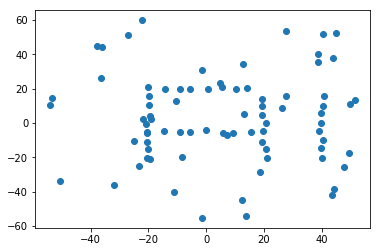

In [6]:
plt.scatter(data['x'], data['y'])
plt.show()

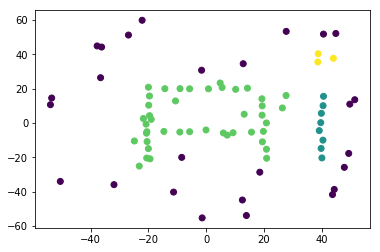

In [7]:
plt.scatter(data['x'], data['y'], c=data['cluster'])
plt.show()